# Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Looking at The Data

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Wrangling The Data

Replace missing value in "bmi" with the mean value of "bmi".

For 'Unknown' (missing data) and 'never smoked' in "smoking_status", replace them with '0'.
Replace 'formerly smoked' in "smoking_status" with '1'. Replace 'smokes' in "smoking_status" with '2'.

In [74]:
df['bmi'] = df['bmi'].replace(np.nan, df['bmi'].mean(axis=0))
df['smoking_status'] = df['smoking_status'].replace(['Unknown', 'never smoked'], 0)
df['smoking_status'] = df['smoking_status'].replace('formerly smoked', 1)
df['smoking_status'] = df['smoking_status'].replace('smokes', 2)

Cut "age" in groups with the groups (0, 49, 75, 100) with labels '0' to '2', create new column "CatAge".

Cut "avg_glucose_level" in groups with the groups (0, 139, 199, 300) with labels '0' to '2', create new column "CatGlucose".

Cut "bmi" in groups with the groups (0, 18.5, 24.9, 29.9, 100) with labels '0' to '3', create new column "CatBMI".

In [75]:
df['CatAge'] = pd.cut(df.age, [0, 49, 75, 100], labels=False)
df['CatGlucose'] = pd.cut(df.avg_glucose_level, [0, 139, 199, 300], labels=False)
df['CatBMI'] = pd.cut(df.bmi, [0, 18.5, 24.9, 29.9, 100], labels=False)

Drop columns "age", "avg_glucose_level", and "bmi".

In [76]:
df = df.drop(['age', 'avg_glucose_level', 'bmi'], axis=1)

In [77]:
df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,CatAge,CatGlucose,CatBMI
0,9046,Male,0,1,Yes,Private,Urban,1,1,1,2,3
1,51676,Female,0,0,Yes,Self-employed,Rural,0,1,1,2,2
2,31112,Male,0,1,Yes,Private,Rural,0,1,2,0,3
3,60182,Female,0,0,Yes,Private,Urban,2,1,0,1,3
4,1665,Female,1,0,Yes,Self-employed,Rural,0,1,2,1,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5110 non-null   int64 
 1   gender          5110 non-null   object
 2   hypertension    5110 non-null   int64 
 3   heart_disease   5110 non-null   int64 
 4   ever_married    5110 non-null   object
 5   work_type       5110 non-null   object
 6   Residence_type  5110 non-null   object
 7   smoking_status  5110 non-null   int64 
 8   stroke          5110 non-null   int64 
 9   CatAge          5110 non-null   int64 
 10  CatGlucose      5110 non-null   int64 
 11  CatBMI          5110 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 479.2+ KB


In [79]:
df.describe()

,id,hypertension,heart_disease,smoking_status,stroke,CatAge,CatGlucose,CatBMI
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.097456,0.054012,0.481996,0.048728,0.523483,0.249511,1.998239
std,21161.721625,0.296607,0.226063,0.747390,0.215320,0.656909,0.601244,0.943395
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,36932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,54682.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000
max,72940.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000


# Machine Learing

Remove gender from our original selection since gender was not good enough as an identifier.

In [17]:
df[["gender","stroke"]].groupby(["gender"], as_index = False).mean()

,gender,stroke
0,Female,0.047094
1,Male,0.051064
2,Other,0.000000


Selecting needed columns for training and testing the data.

In [80]:
df_stroke=df[['smoking_status', 'CatAge', 'CatBMI', 'CatGlucose', 'hypertension', 'heart_disease', 'stroke']]

In [81]:
df_stroke.head()

,smoking_status,CatAge,CatBMI,CatGlucose,hypertension,heart_disease,stroke
0,1,1,3,2,0,1,1
1,0,1,2,2,0,0,1
2,0,2,3,0,0,1,1
3,2,0,3,1,0,0,1
4,0,2,1,1,1,0,1


In [82]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   smoking_status  5110 non-null   int64
 1   CatAge          5110 non-null   int64
 2   CatBMI          5110 non-null   int64
 3   CatGlucose      5110 non-null   int64
 4   hypertension    5110 non-null   int64
 5   heart_disease   5110 non-null   int64
 6   stroke          5110 non-null   int64
dtypes: int64(7)
memory usage: 279.6 KB


Seperate "stroke" and other columns.

In [83]:
x = df_stroke[['smoking_status', 'CatAge', 'CatBMI', 'CatGlucose', 'hypertension', 'heart_disease']]
y = df_stroke[['stroke']]

Scale the data in column "smoking_status", "CatAge", "CatBMI", "CatGlucose".

In [84]:
scaler = MinMaxScaler()

x[['smoking_status', 'CatAge', 'CatBMI', 'CatGlucose']] = scaler.fit_transform(x[['smoking_status', 'CatAge', 'CatBMI', 'CatGlucose']])

Split the data to train and test.

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2)

# Decision Tree Classifier

Finding the max depth for Decision Tree and Random Forest

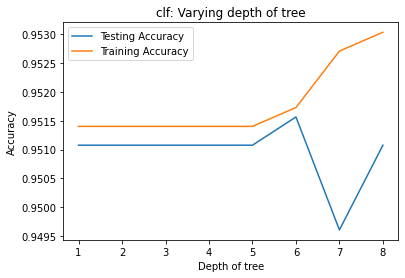

In [86]:
dep = np.arange(1,9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier with max_depth=k
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(x_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [87]:
# Setup a Decision Tree Classifier with max_depth = 6
dt = tree.DecisionTreeClassifier(max_depth=6, random_state=2)

# Fit the classifier to the training data
dt.fit(x_train, y_train)

# Create the predicted tags
y_pred_dt = dt.predict(x_test)

# Calculate the accuracy score: score
acc_dt = accuracy_score(y_test, y_pred_dt)

# Calculate the confusion matrix: cm
cm_dt = confusion_matrix(y_test, y_pred_dt)

Visualizing the confusion matrix, also print out the test and train set accuracy.

Testing-set Accuracy score is: 0.9515655577299413
Training-set Accuracy score is: 0.9517286366601435


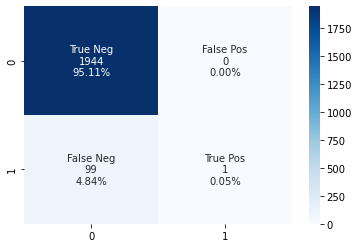

In [88]:
group_names_dt = ['True Neg','False Pos','False Neg','True Pos']
group_counts_dt = ["{0:0.0f}".format(value_dt) for value_dt in
                cm_dt.flatten()]
group_percentages_dt = ["{0:.2%}".format(value_dt) for value_dt in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels_dt = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_dt,group_counts_dt,group_percentages_dt)]
labels_dt = np.asarray(labels_dt).reshape(2,2)
sns.heatmap(cm_dt, annot=labels_dt, fmt='', cmap='Blues')
print('Testing-set Accuracy score is:', acc_dt)
print('Training-set Accuracy score is:',accuracy_score(y_train,dt.predict(x_train)))

# Random Forest Classifier

In [89]:
# Setup a Random Forest Classifier with max_depth=6
rf = RandomForestClassifier(max_depth=6, random_state=2)

# Fit the classifier to the training data
rf = rf.fit(x_train,y_train)

# Create the predicted tags
y_pred_rf = rf.predict(x_test)

# Calculate the accuracy score: score
acc_rf = accuracy_score(y_test, y_pred_rf)

# Calculate the confusion matrix: cm
cm_rf = confusion_matrix(y_test, y_pred_rf)

Visualizing the confusion matrix, also print out the test and train set accuracy.

Testing-set Accuracy score is: 0.952054794520548
Training-set Accuracy score is: 0.952054794520548


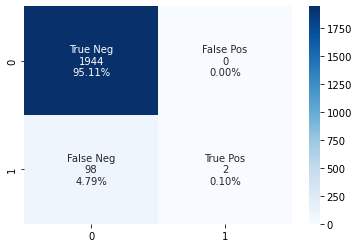

In [90]:
group_names_rf = ['True Neg','False Pos','False Neg','True Pos']
group_counts_rf = ["{0:0.0f}".format(value_rf) for value_rf in
                cm_rf.flatten()]
group_percentages_rf = ["{0:.2%}".format(value_rf) for value_rf in
                     cm_rf.flatten()/np.sum(cm_rf)]
labels_rf = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_rf,group_counts_rf,group_percentages_rf)]
labels_rf = np.asarray(labels_rf).reshape(2,2)
sns.heatmap(cm_rf, annot=labels_rf, fmt='', cmap='Blues')
print('Testing-set Accuracy score is:', acc_rf)
print('Training-set Accuracy score is:',accuracy_score(y_train,rf.predict(x_train)))

# GaussianNB

Finding the best var_smoothing for the data using GridSearchCV.

#Set 'var_smoothing' as the parameter we would like to tune

params_gnb = {'var_smoothing': np.logspace(0,-9, num = 300)}

#Use GridSearchCV to find the best parameter setting based on accuracy scoring

gs_gnb = GridSearchCV(estimator=GaussianNB(), param_grid=params_gnb, scoring='accuracy') 

#Fit GridSearchCV to the training data 

gs_gnb.fit(x_train, y_train)

gs_gnb.best_params_

In [91]:
# Setup a GaussianNB with var_smoothing =1
gnb = GaussianNB(var_smoothing =1)

# Fit the classifier to the training data
gnb.fit(x_train,y_train)

# Create the predicted tags
y_pred_gnb = gnb.predict(x_test)

# Calculate the accuracy score: score
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# Calculate the confusion matrix: cm
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

Visualizing the confusion matrix, also print out the test and train set accuracy.

Testing-set Accuracy score is: 0.949119373776908
Training-set Accuracy score is: 0.949119373776908


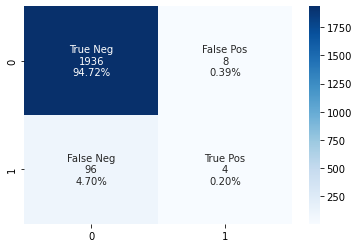

In [92]:
group_names_gnb = ['True Neg','False Pos','False Neg','True Pos']
group_counts_gnb = ["{0:0.0f}".format(value_gnb) for value_gnb in
                cm_gnb.flatten()]
group_percentages_gnb = ["{0:.2%}".format(value_gnb) for value_gnb in
                     cm_gnb.flatten()/np.sum(cm_gnb)]
labels_gnb = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_gnb,group_counts_gnb,group_percentages_gnb)]
labels_gnb = np.asarray(labels_gnb).reshape(2,2)
sns.heatmap(cm_gnb, annot=labels_gnb, fmt='', cmap='Blues')
print('Testing-set Accuracy score is:', acc_gnb)
print('Training-set Accuracy score is:',accuracy_score(y_train,gnb.predict(x_train)))

# MLP Classifier

Finding the best max_iter and hidden_layer_sizes for the data using GridSearchCV.

#Set 'max_iter', 'hidden_layer_size' as the parameter we would like to tune

params_nn = {'max_iter':[200, 500, 1000], 'hidden_layer_sizes':[(2,2), (3,3), (4,4), (5,5), (6,6), (7,7), (8,8), (9,9), (10,10),(20,20)]}

#Use GridSearchCV to find the best parameter setting based on accuracy scoring

grid_nn = GridSearchCV(MLPClassifier(random_state = 2), param_grid= params_nn, scoring = 'accuracy', cv = 5)

#Fit GridSearchCV to the training data 
 
grid_nn.fit(x_train, y_train)

grid_nn.best_params_

#The result showing 'max_iter' : 200 which is the default setting for MLP Classifier

In [93]:
# Setup a MLP Classifier with hidden_layer_sizes = [2,2]
nn = MLPClassifier(hidden_layer_sizes = [2,2], random_state=2)

# Fit the classifier to the training data
nn.fit(x_train,y_train)

# Create the predicted tags
y_pred_nn = nn.predict(x_test)

# Calculate the accuracy score: score
acc_nn = accuracy_score(y_test, y_pred_nn)

# Calculate the confusion matrix: cm
cm_nn = confusion_matrix(y_test, y_pred_nn)

Visualizing the confusion matrix, also print out the test and train set accuracy.

Testing-set Accuracy score is: 0.9510763209393346
Training-set Accuracy score is: 0.951402478799739


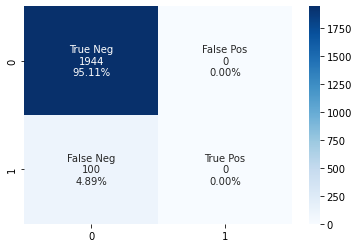

In [94]:
group_names_nn = ['True Neg','False Pos','False Neg','True Pos']
group_counts_nn = ["{0:0.0f}".format(value_nn) for value_nn in
                cm_nn.flatten()]
group_percentages_nn = ["{0:.2%}".format(value_nn) for value_nn in
                     cm_nn.flatten()/np.sum(cm_nn)]
labels_nn = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_nn,group_counts_nn,group_percentages_nn)]
labels_nn = np.asarray(labels_nn).reshape(2,2)
sns.heatmap(cm_nn, annot=labels_nn, fmt='', cmap='Blues')
print('Testing-set Accuracy score is:', acc_nn)
print('Training-set Accuracy score is:',accuracy_score(y_train,nn.predict(x_train)))

# K Neighbors Classifier

Finding the best n_neighbors using GridSearchCV.

#Set 'n_neighbors' as the parameter we would like to tune

params_knc = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

#Use GridSearchCV to find the best parameter setting based on accuracy scoring

gs_knc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_knc, scoring='accuracy', cv = 5) 

#Fit GridSearchCV to the training data 

gs_knc.fit(x_train, y_train)

gs_knc.best_params_

In [95]:
# Setup a K-Neighbors Classifier with n_neighbors = 12
knc = KNeighborsClassifier (n_neighbors=12)

# Fit the classifier to the training data
knc.fit(x_train,y_train)

# Create the predicted tags
y_pred_knc = knc.predict(x_test)

# Calculate the accuracy score: score
acc_knc = accuracy_score(y_test, y_pred_knc)

# Calculate the confusion matrix: cm
cm_knc = confusion_matrix(y_test, y_pred_knc)

Visualizing the confusion matrix, also print out the test and train set accuracy.

Testing-set Accuracy score is: 0.9510763209393346
Training-set Accuracy score is: 0.951402478799739


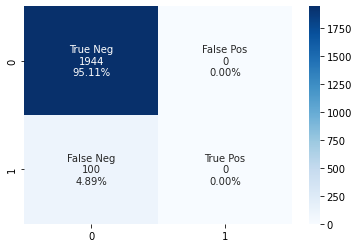

In [96]:
group_names_knc = ['True Neg','False Pos','False Neg','True Pos']
group_counts_knc = ["{0:0.0f}".format(value_knc) for value_knc in
                cm_knc.flatten()]
group_percentages_knc = ["{0:.2%}".format(value_knc) for value_knc in
                     cm_knc.flatten()/np.sum(cm_knc)]
labels_knc = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_knc,group_counts_knc,group_percentages_knc)]
labels_knc = np.asarray(labels_knc).reshape(2,2)
sns.heatmap(cm_knc, annot=labels_knc, fmt='', cmap='Blues')
print('Testing-set Accuracy score is:', acc_knc)
print('Training-set Accuracy score is:',accuracy_score(y_train,knc.predict(x_train)))

# Score Comparision

In [97]:
DT = dt.score(x_test, y_test)
RF = rf.score(x_test, y_test)
GNB = gnb.score(x_test, y_test)
MLP = nn.score(x_test, y_test)
KNC = knc.score(x_test, y_test)

In [98]:
models_scores = pd.DataFrame({'Model' : ['DT', 'RF', 'GNB', 'MLP', 'KNC'], 'Score' : [DT, RF, GNB, MLP, KNC]})
  
print(models_scores)

  Model     Score
0    DT  0.951566
1    RF  0.952055
2   GNB  0.949119
3   MLP  0.951076
4   KNC  0.951076
